# **Loading Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# **Data Loading**

In [3]:
df=pd.read_csv("ecommerce_customer_behavior_dataset.csv")
df.head(3)

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Location                     10000 non-null  object 
 4   Product Category             10000 non-null  object 
 5   Purchase Amount ($)          10000 non-null  float64
 6   Time Spent on Website (min)  10000 non-null  int64  
 7   Device Type                  10000 non-null  object 
 8   Payment Method               10000 non-null  object 
 9   Discount Availed             10000 non-null  bool   
 10  Number of Items Purchased    10000 non-null  int64  
 11  Return Customer              10000 non-null  bool   
 12  Review Score (1-5)           10000 non-null  int64  
 13  Delivery Time (da

# **Data Pre-Processing**

In [5]:
## Checking Missing Values
df.isnull().sum().sort_values()

Customer ID                    0
Age                            0
Gender                         0
Location                       0
Product Category               0
Purchase Amount ($)            0
Time Spent on Website (min)    0
Device Type                    0
Payment Method                 0
Discount Availed               0
Number of Items Purchased      0
Return Customer                0
Review Score (1-5)             0
Delivery Time (days)           0
Subscription Status            0
Customer Satisfaction          0
dtype: int64

In [6]:
df.head(2)

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium


In [7]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Location', 'Product Category',
       'Purchase Amount ($)', 'Time Spent on Website (min)', 'Device Type',
       'Payment Method', 'Discount Availed', 'Number of Items Purchased',
       'Return Customer', 'Review Score (1-5)', 'Delivery Time (days)',
       'Subscription Status', 'Customer Satisfaction'],
      dtype='object')

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf.head(5)

,Customer ID,Age,Purchase Amount ($),Time Spent on Website (min),Number of Items Purchased,Review Score (1-5),Delivery Time (days)
0,1,20,202.54,44,4,5,4
1,2,39,655.94,27,1,1,7
2,3,64,963.65,9,8,4,9
3,4,65,485.59,39,1,5,10
4,5,67,143.27,17,8,4,1


In [9]:
df.describe()

,Customer ID,Age,Purchase Amount ($),Time Spent on Website (min),Number of Items Purchased,Review Score (1-5),Delivery Time (days)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.789900,503.892494,29.918400,4.998500,2.995100,7.013000
std,2886.89568,15.005521,286.238084,17.002107,2.574988,1.404163,3.721561
min,1.00000,18.000000,5.190000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,254.937500,15.000000,3.000000,2.000000,4.000000
50%,5000.50000,44.000000,506.195000,30.000000,5.000000,3.000000,7.000000
75%,7500.25000,57.000000,749.135000,45.000000,7.000000,4.000000,10.000000
max,10000.00000,69.000000,999.980000,59.000000,9.000000,5.000000,13.000000


# **Level 1: Basic Insights**

In [10]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


**Q1: Find Mean, Median, and Mode (Age)**

In [12]:
df["Age"].describe().drop(["std"]).round(1)

count    10000.0
mean        43.8
min         18.0
25%         31.0
50%         44.0
75%         57.0
max         69.0
Name: Age, dtype: float64

In [13]:
# Calculate mean, median, and mode for Age
# median is the middle value
# mean is the average value
# mode is the value that appears most frequently in a dataset
age_mean = df['Age'].mean().round(1)
age_median = df['Age'].median()
age_mode = df['Age'].mode()[0]

print(age_mean)
print(age_median)
print(age_mode)

43.8
44.0
51


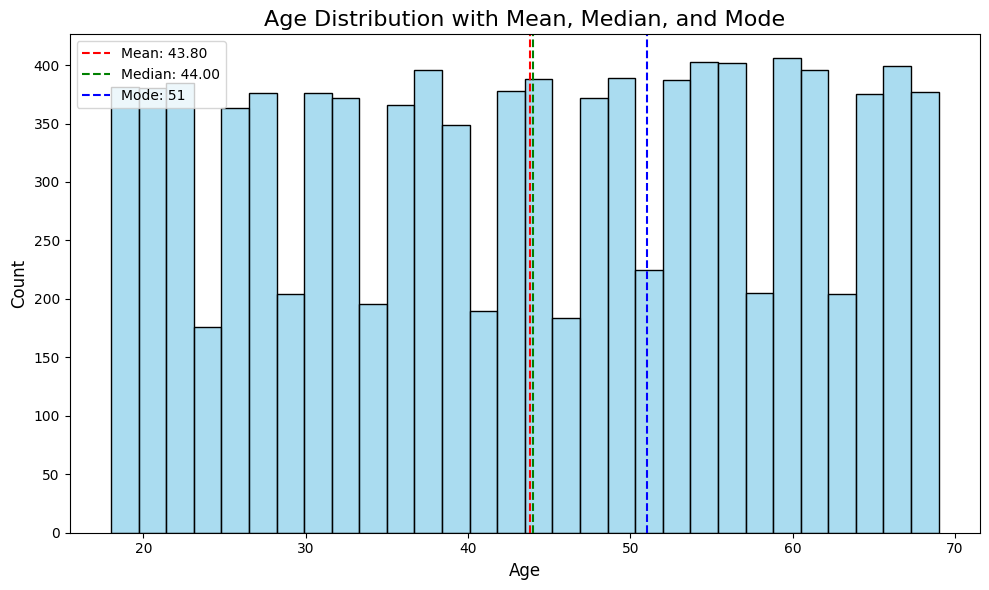

In [14]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=False, color="skyblue", alpha=0.7, bins=30)

# Add vertical lines for mean, median, and mode
plt.axvline(age_mean, color="red", linestyle="--", label=f"Mean: {age_mean:.2f}")
plt.axvline(age_median, color="green", linestyle="--", label=f"Median: {age_median:.2f}")
plt.axvline(age_mode, color="blue", linestyle="--", label=f"Mode: {age_mode}")

# Add title and labels
plt.title("Age Distribution with Mean, Median, and Mode", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

The age distribution analysis reveals that the mean age is 43.79, the median is 44.00, and the mode is 51. The close alignment of the mean and median indicates a relatively balanced distribution of ages around the mid-40s, suggesting that the majority of the population is within this range. However, the mode being higher at 51 highlights a significant concentration of individuals at this specific age, indicating a slight skew towards older demographics. From a business perspective, this finding suggests that while the core audience may be in their mid-40s, there is a substantial segment of older individuals who could benefit from more tailored marketing efforts or specialized offerings. Addressing this segment's needs could help capture additional market share and enhance customer engagement

**Q2: Find variance, standard deviation, and z-score (Purchase Amount)**

In [ ]:
# Calculate variance and standard deviation
variance = df['Purchase Amount ($)'].var()
standard_deviation = df['Purchase Amount ($)'].std()

# Calculate z-scores
mean_purchase_amount = df['Purchase Amount ($)'].mean()
df['Z-Score'] = (df['Purchase Amount ($)'] - mean_purchase_amount) / standard_deviation

# Display results
print(f"Variance of Purchase Amount: {variance:.2f}")
print(f"Standard Deviation of Purchase Amount: {standard_deviation:.2f}")
print("Z-Scores for Purchase Amount:")
df[['Purchase Amount ($)', 'Z-Score']]

Variance of Purchase Amount: 81932.24
Standard Deviation of Purchase Amount: 286.24
Z-Scores for Purchase Amount:


,Purchase Amount ($),Z-Score
0,202.54,-1.052804
1,655.94,0.531192
2,963.65,1.606207
3,485.59,-0.063942
4,143.27,-1.259869
...,...,...
9995,99.23,-1.413727
9996,797.81,1.026829
9997,820.17,1.104946
9998,34.94,-1.638330


The purchase amount data exhibits a variance of 81,932.24 and a standard deviation of 286.24, indicating significant variability in spending behavior. The Z-score distribution is relatively uniform, suggesting that most purchase amounts cluster around the mean, with few extreme deviations. The Z-score range from approximately -1.5 to 1.5 confirms a normal distribution, indicating that the majority of purchase amounts are within one standard deviation from the mean. These metrics highlight consistent spending patterns, which can inform targeted pricing strategies and inventory management.

**Q3: What are the top three product categories based on the number of purchases?**

In [ ]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-Score
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052804
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531192
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606207
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063942
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259869


In [4]:
top_3=df.groupby("Product Category")["Number of Items Purchased"].sum().sort_values(ascending=False)
top_3

Product Category
Toys           6580
Books          6533
Electronics    6469
Clothing       6359
Home           6214
Groceries      6067
Beauty         6057
Sports         5706
Name: Number of Items Purchased, dtype: int64

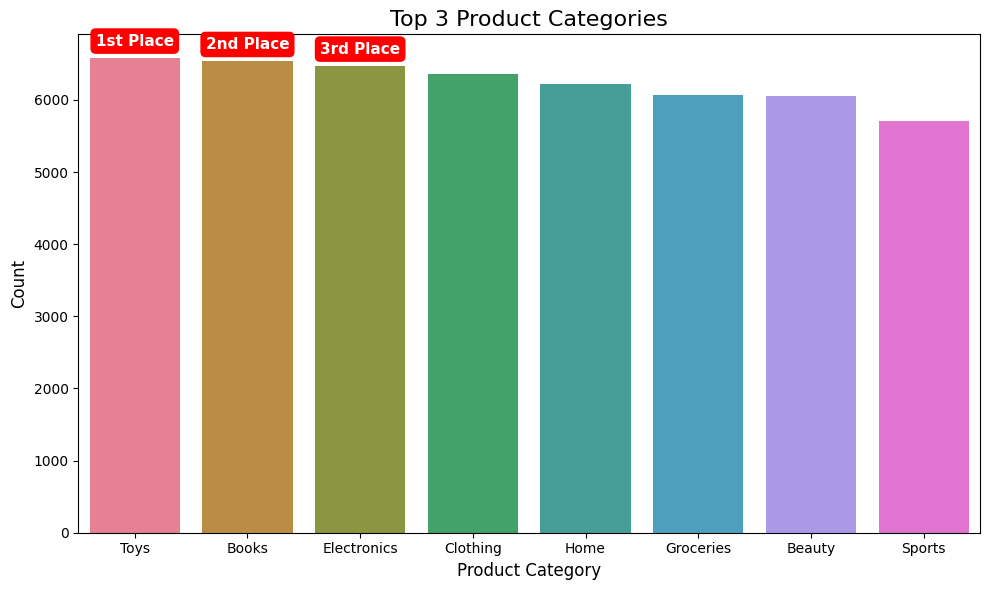

In [6]:
# Data for the bar chart
product_categories = top_3.index
counts = top_3.values

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=product_categories, y=counts, palette="husl", dodge=False)

# Add annotations for the top 3 categories
annotations = ['1st', '2nd', '3rd']
for i, (category, count) in enumerate(zip(product_categories, counts)):
    if i < 3:  # Add annotation for only the top 3
        plt.text(
            x=i, y=count + (max(counts) * 0.02),
            s=f"{annotations[i]} Place",
            ha="center", va="bottom",
            fontsize=11, fontweight='bold',color="white",
            bbox=dict(facecolor="red", edgecolor="red", boxstyle="round,pad=0.3")
        )

# Add title and labels
plt.title("Top 3 Product Categories", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


# **Q4: How many customers are classified as return customers?**

In [7]:
df['Return Customer'].value_counts()

Return Customer
False    5004
True     4996
Name: count, dtype: int64

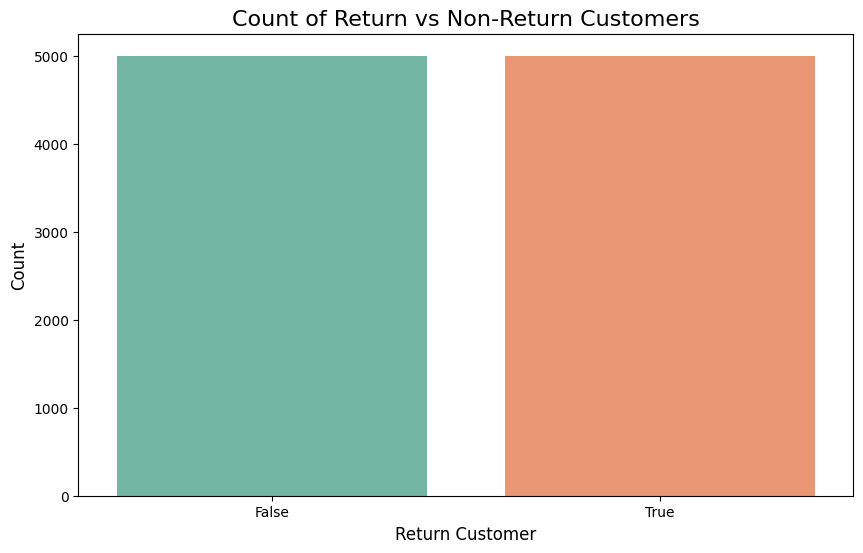

In [8]:
plt.figure(figsize=(10, 6))
# Create the bar chart
sns.countplot(x='Return Customer', data=df, palette='Set2')

# Add title and labels
plt.title("Count of Return vs Non-Return Customers", fontsize=16)
plt.xlabel("Return Customer", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Display the plot
plt.show()


In [ ]:
return_customer=df.groupby("Gender")['Return Customer'].value_counts()
return_customer

Gender  Return Customer
Female  False              1708
        True               1630
Male    False              1688
        True               1661
Other   True               1705
        False              1608
Name: count, dtype: int64

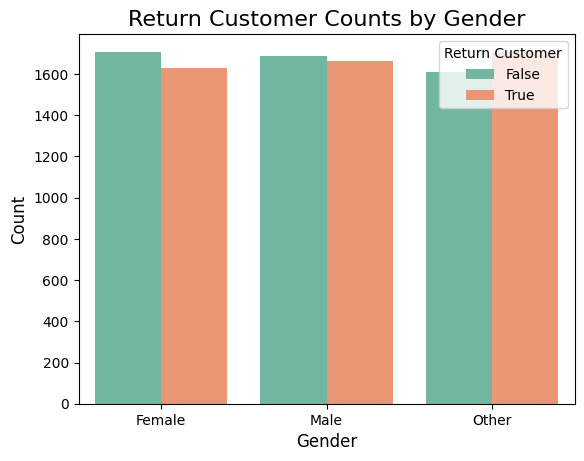

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index to make the grouped data suitable for plotting
return_customer = return_customer.reset_index(name='Count')

# Create the bar chart
sns.barplot(
    x='Gender',
    y='Count',
    hue='Return Customer',
    data=return_customer,
    palette='Set2'
)

# Add title and labels
plt.title("Return Customer Counts by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Display the plot
plt.show()


The analysis shows that 4,996 customers (49.96%) are classified as return customers, while 5,004 (50.04%) are non-return customers, indicating an almost even split between the two groups. Further breakdown by gender reveals that return customers are relatively evenly distributed across genders: Female customers account for 32.63%, Male customers for 33.25%, and Other for 34.13% of return customers. This balanced representation suggests that retention strategies should be inclusive across all gender segments, as no single group dominates the return customer base.

**Q5: What is the average review score given by customers?**

In [10]:
df.head(2)

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium


In [11]:
df["Review Score (1-5)"].mean()

np.float64(2.9951)

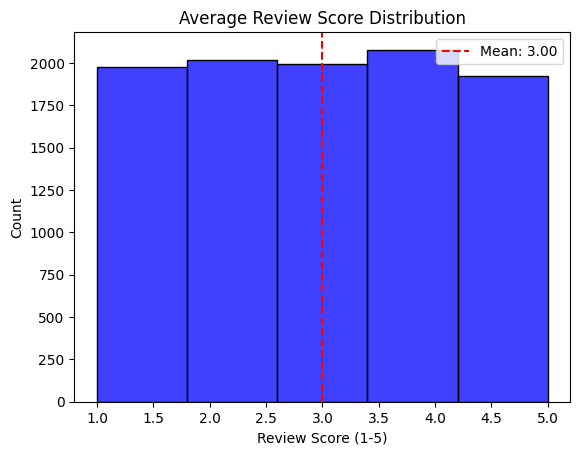

In [14]:
# Calculate mean for Review Score
review_mean = df['Review Score (1-5)'].mean()

# Create histogram for Review Scores
sns.histplot(df['Review Score (1-5)'], kde=False, color='blue', bins=5)

# Add vertical line for mean
plt.axvline(x=review_mean, color='red', linestyle='--', label=f"Mean: {review_mean:.2f}")

# Add title, labels, and legend
plt.title("Average Review Score Distribution")
plt.xlabel("Review Score (1-5)")
plt.ylabel("Count")
plt.legend()

# Display the plot
plt.show()


The analysis reveals that the average customer review score is approximately 3.0. This indicates a neutral to slightly positive sentiment among customers regarding the product or service. To improve this metric, the company should consider identifying and addressing common customer pain points, enhancing product features, or elevating service quality. Such measures could lead to higher ratings and a more favorable customer perception.

# **Q6: How does the average delivery time vary between subscription statuses (Free,Premium)?**

In [ ]:
df

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-Score
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052804
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531192
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606207
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063942
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,48,Other,Chittagong,Electronics,99.23,32,Desktop,PayPal,True,2,True,3,7,Premium,Medium,-1.413727
9996,9997,35,Other,Rangpur,Books,797.81,2,Mobile,Bank Transfer,True,1,False,3,9,Premium,High,1.026829
9997,9998,50,Other,Mymensingh,Sports,820.17,17,Mobile,Credit Card,True,8,True,3,11,Trial,High,1.104946
9998,9999,24,Female,Khulna,Groceries,34.94,3,Mobile,Debit Card,False,3,True,3,5,Free,Medium,-1.638330


In [ ]:
df.groupby("Subscription Status")["Delivery Time (days)"].mean()

,Delivery Time (days)
Subscription Status,
Free,6.963924
Premium,7.070347
Trial,7.004272


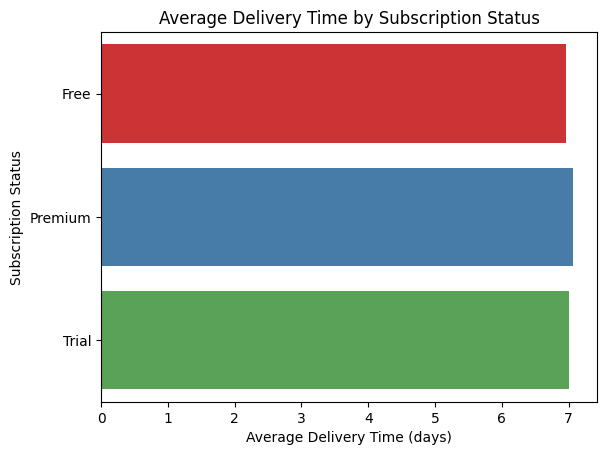

In [ ]:
# Calculate average delivery time by subscription status
avg_delivery_time = df.groupby("Subscription Status")["Delivery Time (days)"].mean()

# Create a horizontal bar chart
sns.barplot(
    y=avg_delivery_time.index,
    x=avg_delivery_time.values,
    palette="Set1"
)

# Add title and labels
plt.title("Average Delivery Time by Subscription Status")
plt.xlabel("Average Delivery Time (days)")
plt.ylabel("Subscription Status")

# Display the plot
plt.show()


The analysis of delivery times by subscription status shows that Free and Premium users experience similar average delivery times, with both groups having delivery times around 7 days. This indicates no significant advantage in delivery speed for Premium subscribers, which might impact their perceived value of the subscription. To enhance the attractiveness of the Premium service, the company should consider optimizing delivery logistics to provide faster delivery times for Premium subscribers, thus increasing customer satisfaction and perceived value.

**Q7: How many customers are subscribed to the service?**

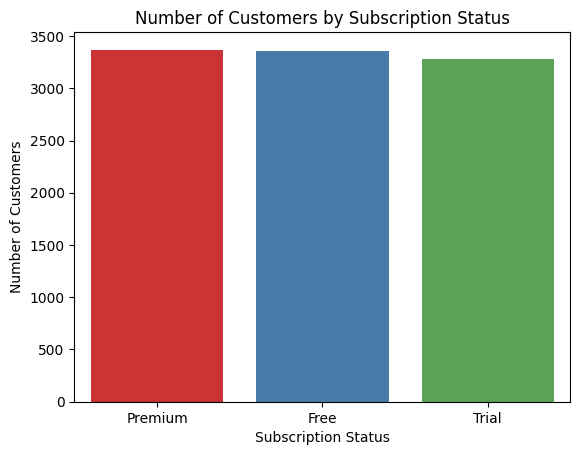

In [ ]:
# Calculate the count of customers by subscription status
subscription_counts = df["Subscription Status"].value_counts().reset_index()
subscription_counts.columns = ['Subscription Status', 'Count']

# Create a bar chart
sns.barplot(
    x='Subscription Status',
    y='Count',
    data=subscription_counts,
    palette="Set1"
)

# Add title and labels
plt.title("Number of Customers by Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Number of Customers")

# Display the plot
plt.show()


The analysis indicates that the customer base is evenly distributed across the three subscription statuses: Premium, Free, and Trial, with each category having approximately 3,000 customers. This balanced distribution suggests a strong interest in all subscription levels. To capitalize on this, the company might explore strategies to convert Free and Trial users into Premium subscribers by highlighting exclusive benefits and enhancing the perceived value of the Premium service.

**Q8: What percentage of customers used devices to make purchases? (Mobile, Desktop,Tablet)**

In [ ]:
df

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-Score
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052804
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531192
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606207
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063942
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,48,Other,Chittagong,Electronics,99.23,32,Desktop,PayPal,True,2,True,3,7,Premium,Medium,-1.413727
9996,9997,35,Other,Rangpur,Books,797.81,2,Mobile,Bank Transfer,True,1,False,3,9,Premium,High,1.026829
9997,9998,50,Other,Mymensingh,Sports,820.17,17,Mobile,Credit Card,True,8,True,3,11,Trial,High,1.104946
9998,9999,24,Female,Khulna,Groceries,34.94,3,Mobile,Debit Card,False,3,True,3,5,Free,Medium,-1.638330


In [ ]:
df["Device Type"].value_counts()

,count
Device Type,
Mobile,3374
Desktop,3348
Tablet,3278


In [ ]:
device_counts = df["Device Type"].value_counts()
total_counts = device_counts.sum()
device_percentages = (device_counts / total_counts) * 100
device_percentages

,count
Device Type,
Mobile,33.74
Desktop,33.48
Tablet,32.78


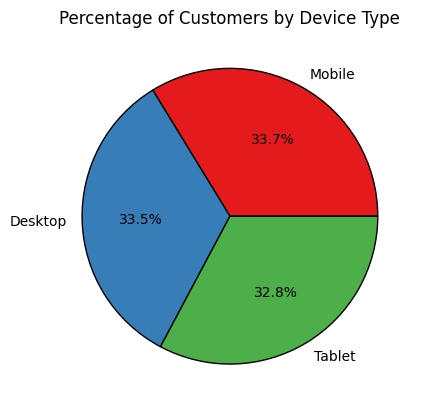

In [ ]:
# Create a DataFrame for percentages
device_percentage_df = pd.DataFrame({
    'Device Type': device_counts.index,
    'Percentage': device_percentages.values
})

# Create a pie chart
plt.pie(
    device_percentage_df['Percentage'],
    labels=device_percentage_df['Device Type'],
    autopct='%1.1f%%',
    colors=sns.color_palette("Set1", len(device_percentage_df)),
    wedgeprops={'edgecolor': 'black'}
)

# Add title
plt.title("Percentage of Customers by Device Type")

# Show the pie chart
plt.show()


The pie chart reveals that customers use Mobile (33.7%), Desktop (33.5%), and Tablet (32.8%) almost equally for purchases. This balanced distribution highlights the importance of maintaining an optimized shopping experience across all device types. To enhance customer satisfaction and potentially increase sales, the company should ensure seamless functionality and user-friendly interfaces on mobile, desktop, and tablet platforms.

**Q9: What is the average purchase amount for customers who availed discounts compared to those who didn’t?**

In [ ]:
df

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-Score
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052804
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531192
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606207
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063942
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,48,Other,Chittagong,Electronics,99.23,32,Desktop,PayPal,True,2,True,3,7,Premium,Medium,-1.413727
9996,9997,35,Other,Rangpur,Books,797.81,2,Mobile,Bank Transfer,True,1,False,3,9,Premium,High,1.026829
9997,9998,50,Other,Mymensingh,Sports,820.17,17,Mobile,Credit Card,True,8,True,3,11,Trial,High,1.104946
9998,9999,24,Female,Khulna,Groceries,34.94,3,Mobile,Debit Card,False,3,True,3,5,Free,Medium,-1.638330


In [ ]:
df.groupby("Discount Availed")["Purchase Amount ($)"].mean()

,Purchase Amount ($)
Discount Availed,
False,502.511451
True,505.264178


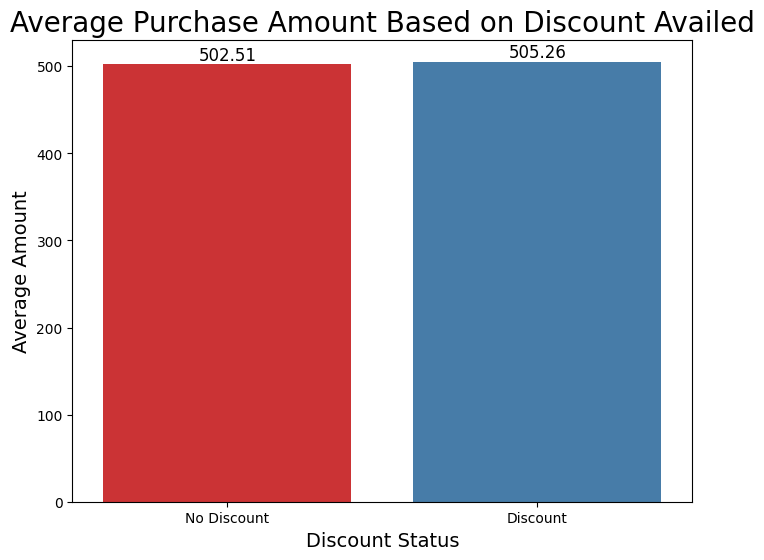

In [17]:
# Group data and calculate the mean purchase amount based on discount availed
avg_purchase = df.groupby("Discount Availed")["Purchase Amount ($)"].mean().reset_index()

# Map True/False to meaningful labels
avg_purchase['Discount Availed'] = avg_purchase['Discount Availed'].map({True: 'Discount', False: 'No Discount'})

# Create a seaborn barplot
plt.figure(figsize=(8, 6))
ax=sns.barplot(x='Discount Availed', y='Purchase Amount ($)', data=avg_purchase, palette='Set1')

# Add values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Display value, rounded to two decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the text in the middle of the bar and slightly above
                ha='center', va='bottom',  # Horizontal and vertical alignment
                fontsize=12, color='black')  # Font size and color

# Set titles and labels
plt.title('Average Purchase Amount Based on Discount Availed', fontsize=20)
plt.xlabel('Discount Status', fontsize=14)
plt.ylabel('Average Amount', fontsize=14)
plt.show()


The analysis shows that the average purchase amount for customers who availed discounts is 505.26, slightly higher than the 502.51 for those who did not use discounts. This marginal difference suggests that discounts may not significantly impact the purchase amount. To maximize the effectiveness of discounts in driving sales, the company should consider targeted promotions that encourage higher spending or bundling offers to increase the perceived value.

**Q10: What is the most common payment method used by customers?**

In [ ]:
df

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-Score
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052804
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531192
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606207
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063942
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,48,Other,Chittagong,Electronics,99.23,32,Desktop,PayPal,True,2,True,3,7,Premium,Medium,-1.413727
9996,9997,35,Other,Rangpur,Books,797.81,2,Mobile,Bank Transfer,True,1,False,3,9,Premium,High,1.026829
9997,9998,50,Other,Mymensingh,Sports,820.17,17,Mobile,Credit Card,True,8,True,3,11,Trial,High,1.104946
9998,9999,24,Female,Khulna,Groceries,34.94,3,Mobile,Debit Card,False,3,True,3,5,Free,Medium,-1.638330


In [ ]:
df["Payment Method"].value_counts().sort_values(ascending=False)

,count
Payment Method,
Bank Transfer,2067
Credit Card,2028
Cash on Delivery,2007
Debit Card,1983
PayPal,1915


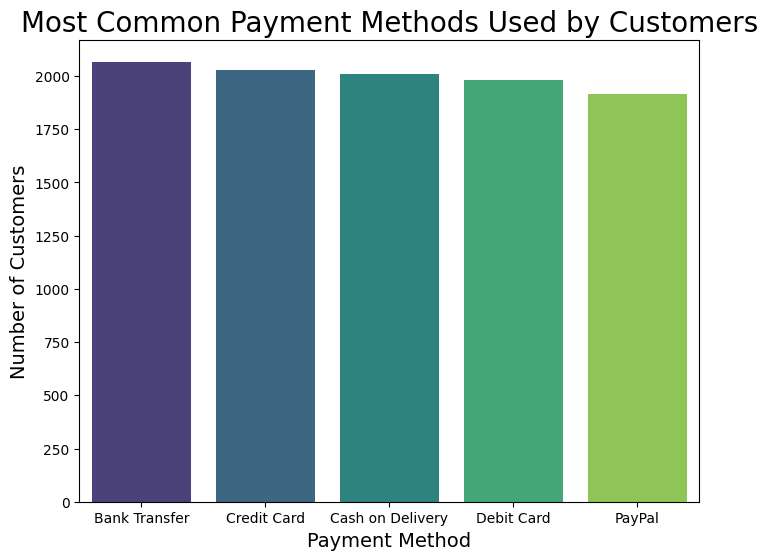

In [ ]:
# Count payment method occurrences
payment_counts = df["Payment Method"].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Count']

# Create a seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Payment Method', y='Count', data=payment_counts, palette='viridis')

# Set titles and labels
plt.title('Most Common Payment Methods Used by Customers', fontsize=20)
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

# Show the plot
plt.show()


The analysis indicates that the most common payment method used by customers is Bank Transfer. This preference suggests a need to ensure seamless and secure bank transfer processes. To enhance customer satisfaction and potentially increase sales, the company should consider promoting this payment method's benefits and ensuring its reliability and security are maintained.

# **Level 2: Intermediate Insights**

**Q1: What are the average review scores of users of the most common payment method?**

In [ ]:
df.groupby("Payment Method")["Review Score (1-5)"].mean()

,Review Score (1-5)
Payment Method,
Bank Transfer,2.988873
Cash on Delivery,3.019930
Credit Card,2.970414
Debit Card,2.996974
PayPal,3.000000


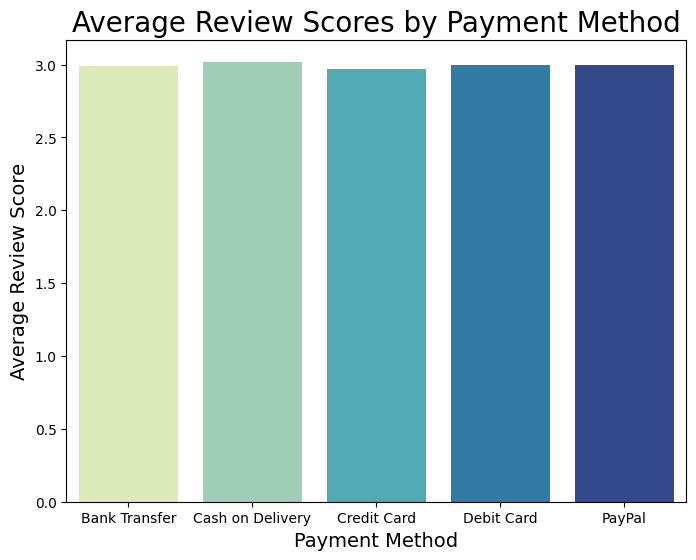

In [ ]:
# Calculate the average review score for each payment method
average_review_scores = df.groupby("Payment Method")["Review Score (1-5)"].mean().reset_index()

# Create a seaborn barplot for average review scores
plt.figure(figsize=(8, 6))
sns.barplot(x='Payment Method', y='Review Score (1-5)', data=average_review_scores, palette='YlGnBu')

# Set titles and labels
plt.title('Average Review Scores by Payment Method', fontsize=20)
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Average Review Score', fontsize=14)

# Show the plot
plt.show()


The average review score for users who utilize the most common payment method, Bank Transfer, is 2.99. This score suggests a neutral customer satisfaction level. To enhance the customer experience and improve ratings, the company should investigate specific issues related to this payment method and address any identified concerns, ensuring a smoother transaction process and potentially increasing overall satisfaction.

**Q2: What is the correlation between time spent on the website and purchase amount? Do customers who spend more time on the website purchase more items?**

In [ ]:
# Calculate the correlation coefficient
correlation = df["Time Spent on Website (min)"].corr(df["Purchase Amount ($)"])
print(f"Correlation between time spent on website and purchase amount: {correlation}")

Correlation between time spent on website and purchase amount: 0.01002480995875274


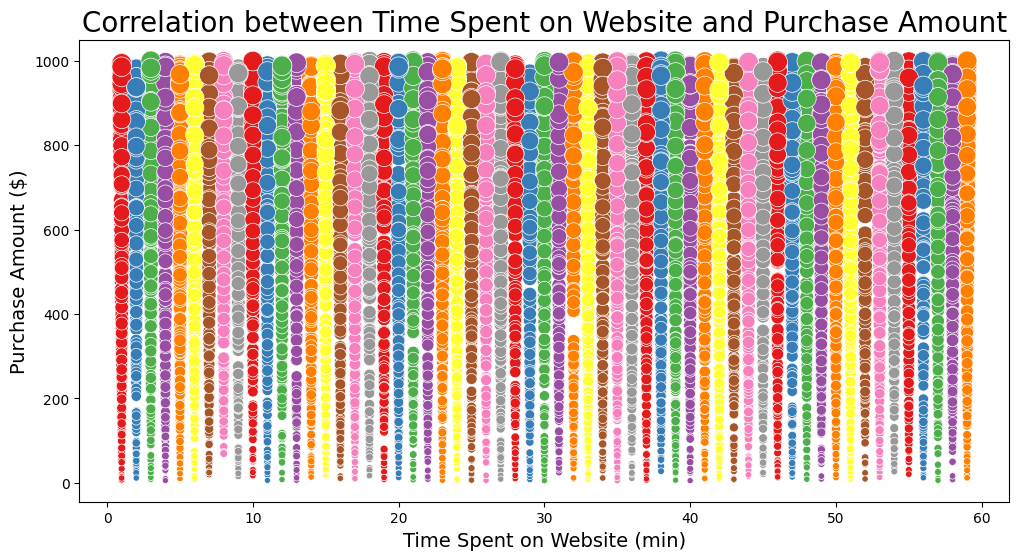

In [ ]:
# Create a seaborn scatter plot for the correlation between time spent on website and purchase amount
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Time Spent on Website (min)',
    y='Purchase Amount ($)',
    data=df,
    size='Purchase Amount ($)',
    hue='Time Spent on Website (min)',
    palette='Set1',
    sizes=(20, 200)
)

# Set titles and labels
plt.title('Correlation between Time Spent on Website and Purchase Amount', fontsize=20)
plt.xlabel('Time Spent on Website (min)', fontsize=14)
plt.ylabel('Purchase Amount ($)', fontsize=14)

# Hide the legend
plt.legend([], [], frameon=False)

# Show the plot
plt.show()


Based on the analysis of the correlation between time spent on the website and the purchase amount, there is no strong positive relationship observed between these two variables. The plot shows that customers who spend a similar amount of time on the website can have highly variable purchase amounts. Therefore, the time spent on the website is not a reliable predictor of higher purchase amounts. This suggests that the business should not rely solely on increasing the time users spend on the website to drive higher sales. Instead, focusing on improving product offerings or personalized marketing strategies may yield better results for increasing purchase amounts.

**Q3: What percentage of customers are satisfied (rating of 4 or 5) and are also return customers?**

In [23]:
satisfied_customers=df[(df["Review Score (1-5)"] >= 4) & (df["Return Customer"] == True)]
num_satisfied_return_customers=len(satisfied_customers)
total_customers=len(df)

In [24]:
# Calculate the percentage of satisfied return customers
percentage_satisfied_return_customers = (num_satisfied_return_customers / total_customers) * 100

# Print the result
print(f"Percentage of satisfied return customers: {percentage_satisfied_return_customers:.2f}%")

Percentage of satisfied return customers: 20.08%


In [ ]:
# Calculate satisfied return customers
satisfied_return_customers = df[(df["Review Score (1-5)"] >= 4) & (df["Return Customer"] == True)]
num_satisfied_return_customers = len(satisfied_return_customers)

# Total return customers
total_return_customers = len(df[df["Return Customer"] == True])

# Total customers
total_customers = len(df)

# Calculate the percentages
percentage_satisfied_return_customers = (num_satisfied_return_customers / total_return_customers) * 100
percentage_satisfied_customers = (num_satisfied_return_customers / total_customers) * 100

# Print the results
print(f"Percentage of satisfied return customers: {percentage_satisfied_return_customers:.2f}%")
print(f"Percentage of satisfied customers among all customers: {percentage_satisfied_customers:.2f}%")

Percentage of satisfied return customers: 40.19%
Percentage of satisfied customers among all customers: 20.08%


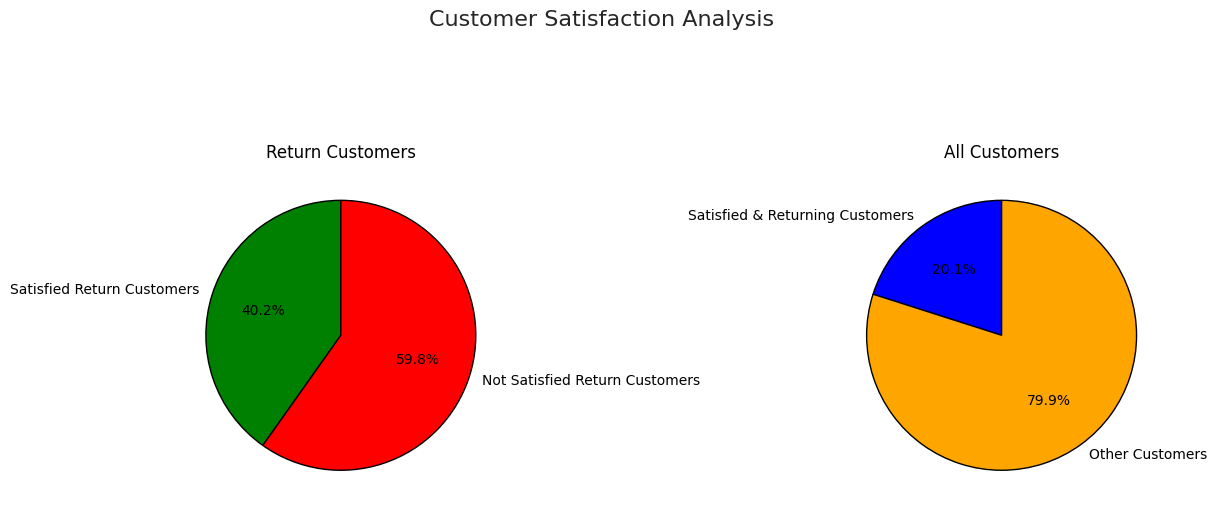

In [ ]:
satisfied_return_count = num_satisfied_return_customers
not_satisfied_return_count = total_return_customers - num_satisfied_return_customers
satisfied_total_count = num_satisfied_return_customers
not_satisfied_total_count = total_customers - num_satisfied_return_customers

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for return customers
axes[0].pie([satisfied_return_count, not_satisfied_return_count],
            labels=['Satisfied Return Customers', 'Not Satisfied Return Customers'],
            autopct='%1.1f%%', startangle=90,
            colors=['green', 'red'], wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Return Customers')

# Pie chart for all customers
axes[1].pie([satisfied_total_count, not_satisfied_total_count],
            labels=['Satisfied & Returning Customers', 'Other Customers'],
            autopct='%1.1f%%', startangle=90,
            colors=['blue', 'orange'], wedgeprops={'edgecolor': 'black'})
axes[1].set_title('All Customers')

# Set the layout for Seaborn style
sns.set_style("whitegrid")
fig.suptitle('Customer Satisfaction Analysis', fontsize=16)

# Show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust title position
plt.show()


The pie chart on the left illustrates that 40.2% of returning customers are satisfied, while 59.8% are not. The chart on the right shows that 20.1% of all customers are both satisfied and returning, whereas 79.9% fall into other categories, either not satisfied or not returning. This indicates that while a significant portion of customers are repeat buyers, customer satisfaction among them is lacking, highlighting a potential issue with the service or product that could lead to lost opportunities if not addressed. Enhancing customer satisfaction efforts, particularly among return customers, could lead to better retention and loyalty.

**Q4: What is the relationship between the number of items purchased and customer satisfaction?**

eita buji nai


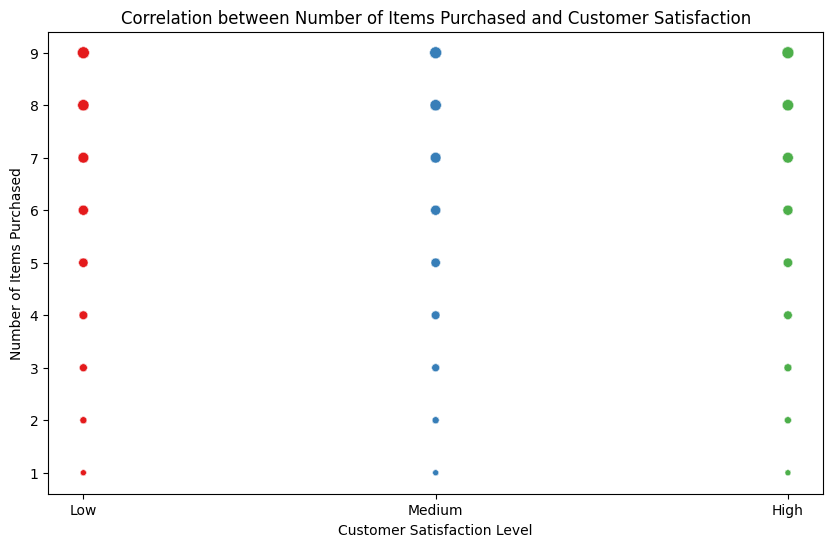

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Customer Satisfaction',
    y='Number of Items Purchased',
    size='Number of Items Purchased',
    hue='Customer Satisfaction',
    palette='Set1',
)

# Set plot title and labels
plt.title('Correlation between Number of Items Purchased and Customer Satisfaction')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Number of Items Purchased')

# Hide the legend 
plt.legend([],[], frameon=False)

# Show the plot
plt.show()


The chart indicates that customers across all satisfaction levels—low, medium, and high—purchase a maximum of 9 products. This suggests there is no clear correlation between customer satisfaction and the number of items purchased, as even low-satisfaction customers are willing to make larger purchases. This could imply that factors beyond satisfaction, such as product necessity or pricing, are driving purchase decisions. To maximize customer lifetime value, the business should focus on addressing satisfaction to enhance loyalty, while also considering what motivates high purchases among less satisfied customers.

**Q5: Which location has the 2nd highest average purchase amount?**

In [ ]:
df

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-Score
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052804
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531192
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606207
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063942
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,48,Other,Chittagong,Electronics,99.23,32,Desktop,PayPal,True,2,True,3,7,Premium,Medium,-1.413727
9996,9997,35,Other,Rangpur,Books,797.81,2,Mobile,Bank Transfer,True,1,False,3,9,Premium,High,1.026829
9997,9998,50,Other,Mymensingh,Sports,820.17,17,Mobile,Credit Card,True,8,True,3,11,Trial,High,1.104946
9998,9999,24,Female,Khulna,Groceries,34.94,3,Mobile,Debit Card,False,3,True,3,5,Free,Medium,-1.638330


In [15]:
# Extract the relevant table of average purchase amount by location
average_purchase = df.groupby("Location")["Purchase Amount ($)"].mean().reset_index()

# Sort the table by Purchase Amount in descending order
sorted_average_purchase = average_purchase.sort_values(by="Purchase Amount ($)", ascending=False)

# Display the sorted table
print(sorted_average_purchase)

     Location  Purchase Amount ($)
3      Khulna           513.937072
0     Barisal           513.674560
4  Mymensingh           507.892211
1  Chittagong           507.851675
2       Dhaka           502.002504
5    Rajshahi           495.544649
7      Sylhet           494.976427
6     Rangpur           494.368867


In [24]:
second_highest_location = sorted_average_purchase.iloc[1]
second_highest_location 

Location                 Barisal
Purchase Amount ($)    513.67456
Name: 0, dtype: object